In [1]:
"""
추천시스템

"""

'\n추천시스템\n\n'

In [2]:
import pandas as pd
import numpy as np

In [4]:
df1=pd.read_csv("tmdb_5000_credits.csv")
df2=pd.read_csv("tmdb_5000_movies.csv")

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [7]:
df1

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [9]:
df2

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [12]:
pd.merge(df1,df2,right_on=['id','title'],left_on=['movie_id','title'])

,movie_id,title_x,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_y,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [14]:
pd.concat([df1,df2], axis=1).head(1)

,movie_id,title,cast,crew,budget,genres,homepage,id,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [ ]:
df2.rename(columns = {'id' : 'movie_id'}, inplace = True)
df = pd.merge(df1, df2, how='outer', on = 'movie_id')

In [19]:
df1.columns=['id', 'title', 'cast', 'crew']

In [21]:
df=df2.merge(df1, on ='id')

In [23]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [25]:
c=df['vote_average'].mean()
c

6.092171559442016

In [27]:
m=df['vote_count'].quantile(0.9)
m #영화 차트에 실리기 위한 최소 투표수

1838.4000000000015

In [30]:
q_movies=df.loc[df['vote_count']>=m]


In [31]:
q_movies.shape

(481, 23)

In [32]:
def weighted_rating(x, m=m, c=c):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * c)

In [34]:
#for문 보다는 apply 권장
q_movies['score']=q_movies.apply(weighted_rating, axis=1)


C:\Users\user\AppData\Local\Temp\ipykernel_2564\2360252803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q_movies['score']=q_movies.apply(weighted_rating, axis=1)


In [35]:
q_movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669


In [36]:
q_movies=q_movies.sort_values('score', ascending=False)

In [37]:
q_movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,score
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,The Shawshank Redemption,8.5,8205,The Shawshank Redemption,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258
662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,Fight Club,8.3,9413,Fight Club,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,The Dark Knight,8.2,12002,The Dark Knight,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020
3232,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,8.3,8428,Pulp Fiction,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",7.904645
96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,Inception,8.1,13752,Inception,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",7.863239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,200000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://greenlanternmovie.warnerbros.com/,44912,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 4375...",en,Green Lantern,"For centuries, a small but powerful force of w...",51.872839,"[{""name"": ""De Line Pictures"", ""id"": 2609}, {""n...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"In our darkest hour, there will be light.",Green Lantern,5.1,2487,Green Lantern,"[{""cast_id"": 6, ""character"": ""Hal Jordan / Gre...","[{""credit_id"": ""52fe46a3c3a36847f8109f09"", ""de...",5.521697
337,92000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://www.diehardmovie.com/,47964,"[{""id"": 258, ""name"": ""bomb""}, {""id"": 591, ""nam...",en,A Good Day to Die Hard,"Iconoclastic, take-no-prisoners cop John McCla...",65.402595,"[{""name"": ""In

In [41]:
pop=df.sort_values('popularity', ascending=False)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [43]:
tfidf=TfidfVectorizer(stop_words='english')

In [47]:
df['overview']=df['overview'].fillna("")

In [48]:
df['overview'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4803 entries, 0 to 4802
Series name: overview
Non-Null Count  Dtype 
--------------  ----- 
4803 non-null   object
dtypes: object(1)
memory usage: 75.0+ KB


In [49]:
tfidf_mat=tfidf.fit_transform(df['overview'])

In [51]:
tfidf_mat.shape # (4803, 20978) 단어 =>  차원축소(pca, svd 등) # 4803,10 => + 송강호 황정민 ... => 코사인유사도
                                                                                 1   0   1   1

(4803, 20978)

In [146]:
480300*100*4/1000000

192.12

In [ ]:
#tfidf_mat=tf(dtm) * idf

In [52]:
from sklearn.metrics.pairwise import linear_kernel

In [53]:
cos_sim=linear_kernel(tfidf_mat, tfidf_mat)

In [55]:
cos_sim.shape

(4803, 4803)

In [56]:
cos_sim[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [61]:
#df.index
df['title_x']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title_x, Length: 4803, dtype: object

In [63]:
indices=pd.Series(df.index, index=df['title_x'])

In [82]:
df['title_x']

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title_x, Length: 4803, dtype: object

In [64]:
indices

title_x
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [86]:
def get_recommendations(title, cosine_sim=cos_sim):
    idx=indices[title]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores, key=lambda x:x[1], reverse=True)
    #print(sim_scores)
    sim_scores=sim_scores[1:11]
    m_indices=[i[0] for i in sim_scores]
    return df['title_x'].iloc[m_indices]
    #pass

In [87]:
print(df[df['title_x']=='The Avengers']['overview'])

16    When an unexpected enemy emerges and threatens...
Name: overview, dtype: object


In [88]:
get_recommendations("The Avengers")

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title_x, dtype: object

In [89]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"[{

In [100]:
from ast import literal_eval

In [101]:
#df[['cast','crew','keywords','genres']]

#df[['cast','crew','keywords','genres']]

for f in ['cast','crew','keywords','genres']:
    df[f] = df[f].apply(literal_eval)

ValueError: malformed node or string: [{'cast_id': 242, 'character': 'Jake Sully', 'credit_id': '5602a8a7c3a3685532001c9a', 'gender': 2, 'id': 65731, 'name': 'Sam Worthington', 'order': 0}, {'cast_id': 3, 'character': 'Neytiri', 'credit_id': '52fe48009251416c750ac9cb', 'gender': 1, 'id': 8691, 'name': 'Zoe Saldana', 'order': 1}, {'cast_id': 25, 'character': 'Dr. Grace Augustine', 'credit_id': '52fe48009251416c750aca39', 'gender': 1, 'id': 10205, 'name': 'Sigourney Weaver', 'order': 2}, {'cast_id': 4, 'character': 'Col. Quaritch', 'credit_id': '52fe48009251416c750ac9cf', 'gender': 2, 'id': 32747, 'name': 'Stephen Lang', 'order': 3}, {'cast_id': 5, 'character': 'Trudy Chacon', 'credit_id': '52fe48009251416c750ac9d3', 'gender': 1, 'id': 17647, 'name': 'Michelle Rodriguez', 'order': 4}, {'cast_id': 8, 'character': 'Selfridge', 'credit_id': '52fe48009251416c750ac9e1', 'gender': 2, 'id': 1771, 'name': 'Giovanni Ribisi', 'order': 5}, {'cast_id': 7, 'character': 'Norm Spellman', 'credit_id': '52fe48009251416c750ac9dd', 'gender': 2, 'id': 59231, 'name': 'Joel David Moore', 'order': 6}, {'cast_id': 9, 'character': 'Moat', 'credit_id': '52fe48009251416c750ac9e5', 'gender': 1, 'id': 30485, 'name': 'CCH Pounder', 'order': 7}, {'cast_id': 11, 'character': 'Eytukan', 'credit_id': '52fe48009251416c750ac9ed', 'gender': 2, 'id': 15853, 'name': 'Wes Studi', 'order': 8}, {'cast_id': 10, 'character': "Tsu'Tey", 'credit_id': '52fe48009251416c750ac9e9', 'gender': 2, 'id': 10964, 'name': 'Laz Alonso', 'order': 9}, {'cast_id': 12, 'character': 'Dr. Max Patel', 'credit_id': '52fe48009251416c750ac9f1', 'gender': 2, 'id': 95697, 'name': 'Dileep Rao', 'order': 10}, {'cast_id': 13, 'character': 'Lyle Wainfleet', 'credit_id': '52fe48009251416c750ac9f5', 'gender': 2, 'id': 98215, 'name': 'Matt Gerald', 'order': 11}, {'cast_id': 32, 'character': 'Private Fike', 'credit_id': '52fe48009251416c750aca5b', 'gender': 2, 'id': 154153, 'name': 'Sean Anthony Moran', 'order': 12}, {'cast_id': 33, 'character': 'Cryo Vault Med Tech', 'credit_id': '52fe48009251416c750aca5f', 'gender': 2, 'id': 397312, 'name': 'Jason Whyte', 'order': 13}, {'cast_id': 34, 'character': 'Venture Star Crew Chief', 'credit_id': '52fe48009251416c750aca63', 'gender': 2, 'id': 42317, 'name': 'Scott Lawrence', 'order': 14}, {'cast_id': 35, 'character': 'Lock Up Trooper', 'credit_id': '52fe48009251416c750aca67', 'gender': 2, 'id': 986734, 'name': 'Kelly Kilgour', 'order': 15}, {'cast_id': 36, 'character': 'Shuttle Pilot', 'credit_id': '52fe48009251416c750aca6b', 'gender': 0, 'id': 1207227, 'name': 'James Patrick Pitt', 'order': 16}, {'cast_id': 37, 'character': 'Shuttle Co-Pilot', 'credit_id': '52fe48009251416c750aca6f', 'gender': 0, 'id': 1180936, 'name': 'Sean Patrick Murphy', 'order': 17}, {'cast_id': 38, 'character': 'Shuttle Crew Chief', 'credit_id': '52fe48009251416c750aca73', 'gender': 2, 'id': 1019578, 'name': 'Peter Dillon', 'order': 18}, {'cast_id': 39, 'character': 'Tractor Operator / Troupe', 'credit_id': '52fe48009251416c750aca77', 'gender': 0, 'id': 91443, 'name': 'Kevin Dorman', 'order': 19}, {'cast_id': 40, 'character': 'Dragon Gunship Pilot', 'credit_id': '52fe48009251416c750aca7b', 'gender': 2, 'id': 173391, 'name': 'Kelson Henderson', 'order': 20}, {'cast_id': 41, 'character': 'Dragon Gunship Gunner', 'credit_id': '52fe48009251416c750aca7f', 'gender': 0, 'id': 1207236, 'name': 'David Van Horn', 'order': 21}, {'cast_id': 42, 'character': 'Dragon Gunship Navigator', 'credit_id': '52fe48009251416c750aca83', 'gender': 0, 'id': 215913, 'name': 'Jacob Tomuri', 'order': 22}, {'cast_id': 43, 'character': 'Suit #1', 'credit_id': '52fe48009251416c750aca87', 'gender': 0, 'id': 143206, 'name': 'Michael Blain-Rozgay', 'order': 23}, {'cast_id': 44, 'character': 'Suit #2', 'credit_id': '52fe48009251416c750aca8b', 'gender': 2, 'id': 169676, 'name': 'Jon Curry', 'order': 24}, {'cast_id': 46, 'character': 'Ambient Room Tech', 'credit_id': '52fe48009251416c750aca8f', 'gender': 0, 'id': 1048610, 'name': 'Luke Hawker', 'order': 25}, {'cast_id': 47, 'character': 'Ambient Room Tech / Troupe', 'credit_id': '52fe48009251416c750aca93', 'gender': 0, 'id': 42288, 'name': 'Woody Schultz', 'order': 26}, {'cast_id': 48, 'character': 'Horse Clan Leader', 'credit_id': '52fe48009251416c750aca97', 'gender': 2, 'id': 68278, 'name': 'Peter Mensah', 'order': 27}, {'cast_id': 49, 'character': 'Link Room Tech', 'credit_id': '52fe48009251416c750aca9b', 'gender': 0, 'id': 1207247, 'name': 'Sonia Yee', 'order': 28}, {'cast_id': 50, 'character': 'Basketball Avatar / Troupe', 'credit_id': '52fe48009251416c750aca9f', 'gender': 1, 'id': 1207248, 'name': 'Jahnel Curfman', 'order': 29}, {'cast_id': 51, 'character': 'Basketball Avatar', 'credit_id': '52fe48009251416c750acaa3', 'gender': 0, 'id': 89714, 'name': 'Ilram Choi', 'order': 30}, {'cast_id': 52, 'character': "Na'vi Child", 'credit_id': '52fe48009251416c750acaa7', 'gender': 0, 'id': 1207249, 'name': 'Kyla Warren', 'order': 31}, {'cast_id': 53, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acaab', 'gender': 0, 'id': 1207250, 'name': 'Lisa Roumain', 'order': 32}, {'cast_id': 54, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acaaf', 'gender': 1, 'id': 83105, 'name': 'Debra Wilson', 'order': 33}, {'cast_id': 57, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acabb', 'gender': 0, 'id': 1207253, 'name': 'Chris Mala', 'order': 34}, {'cast_id': 55, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acab3', 'gender': 0, 'id': 1207251, 'name': 'Taylor Kibby', 'order': 35}, {'cast_id': 56, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acab7', 'gender': 0, 'id': 1207252, 'name': 'Jodie Landau', 'order': 36}, {'cast_id': 58, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acabf', 'gender': 0, 'id': 1207254, 'name': 'Julie Lamm', 'order': 37}, {'cast_id': 59, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acac3', 'gender': 0, 'id': 1207257, 'name': 'Cullen B. Madden', 'order': 38}, {'cast_id': 60, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acac7', 'gender': 0, 'id': 1207259, 'name': 'Joseph Brady Madden', 'order': 39}, {'cast_id': 61, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acacb', 'gender': 0, 'id': 1207262, 'name': 'Frankie Torres', 'order': 40}, {'cast_id': 62, 'character': 'Troupe', 'credit_id': '52fe48009251416c750acacf', 'gender': 1, 'id': 1158600, 'name': 'Austin Wilson', 'order': 41}, {'cast_id': 63, 'character': 'Troupe', 'credit_id': '52fe48019251416c750acad3', 'gender': 1, 'id': 983705, 'name': 'Sara Wilson', 'order': 42}, {'cast_id': 64, 'character': 'Troupe', 'credit_id': '52fe48019251416c750acad7', 'gender': 0, 'id': 1207263, 'name': 'Tamica Washington-Miller', 'order': 43}, {'cast_id': 65, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acadb', 'gender': 1, 'id': 1145098, 'name': 'Lucy Briant', 'order': 44}, {'cast_id': 66, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acadf', 'gender': 2, 'id': 33305, 'name': 'Nathan Meister', 'order': 45}, {'cast_id': 67, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acae3', 'gender': 0, 'id': 1207264, 'name': 'Gerry Blair', 'order': 46}, {'cast_id': 68, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acae7', 'gender': 2, 'id': 33311, 'name': 'Matthew Chamberlain', 'order': 47}, {'cast_id': 69, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acaeb', 'gender': 0, 'id': 1207265, 'name': 'Paul Yates', 'order': 48}, {'cast_id': 70, 'character': 'Op Center Duty Officer', 'credit_id': '52fe48019251416c750acaef', 'gender': 0, 'id': 1207266, 'name': 'Wray Wilson', 'order': 49}, {'cast_id': 71, 'character': 'Op Center Staff', 'credit_id': '52fe48019251416c750acaf3', 'gender': 2, 'id': 54492, 'name': 'James Gaylyn', 'order': 50}, {'cast_id': 72, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acaf7', 'gender': 0, 'id': 1207267, 'name': 'Melvin Leno Clark III', 'order': 51}, {'cast_id': 73, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acafb', 'gender': 0, 'id': 1207268, 'name': 'Carvon Futrell', 'order': 52}, {'cast_id': 74, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acaff', 'gender': 0, 'id': 1207269, 'name': 'Brandon Jelkes', 'order': 53}, {'cast_id': 75, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb03', 'gender': 0, 'id': 1207270, 'name': 'Micah Moch', 'order': 54}, {'cast_id': 76, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb07', 'gender': 0, 'id': 1207271, 'name': 'Hanniyah Muhammad', 'order': 55}, {'cast_id': 77, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb0b', 'gender': 0, 'id': 1207272, 'name': 'Christopher Nolen', 'order': 56}, {'cast_id': 78, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb0f', 'gender': 0, 'id': 1207273, 'name': 'Christa Oliver', 'order': 57}, {'cast_id': 79, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb13', 'gender': 0, 'id': 1207274, 'name': 'April Marie Thomas', 'order': 58}, {'cast_id': 80, 'character': 'Dancer', 'credit_id': '52fe48019251416c750acb17', 'gender': 0, 'id': 1207275, 'name': 'Bravita A. Threatt', 'order': 59}, {'cast_id': 81, 'character': 'Mining Chief (uncredited)', 'credit_id': '52fe48019251416c750acb1b', 'gender': 0, 'id': 1207276, 'name': 'Colin Bleasdale', 'order': 60}, {'cast_id': 82, 'character': 'Veteran Miner (uncredited)', 'credit_id': '52fe48019251416c750acb1f', 'gender': 0, 'id': 107969, 'name': 'Mike Bodnar', 'order': 61}, {'cast_id': 83, 'character': 'Richard (uncredited)', 'credit_id': '52fe48019251416c750acb23', 'gender': 0, 'id': 1207278, 'name': 'Matt Clayton', 'order': 62}, {'cast_id': 84, 'character': "Nav'i (uncredited)", 'credit_id': '52fe48019251416c750acb27', 'gender': 1, 'id': 147898, 'name': 'Nicole Dionne', 'order': 63}, {'cast_id': 85, 'character': 'Trooper (uncredited)', 'credit_id': '52fe48019251416c750acb2b', 'gender': 0, 'id': 1207280, 'name': 'Jamie Harrison', 'order': 64}, {'cast_id': 86, 'character': 'Trooper (uncredited)', 'credit_id': '52fe48019251416c750acb2f', 'gender': 0, 'id': 1207281, 'name': 'Allan Henry', 'order': 65}, {'cast_id': 87, 'character': 'Ground Technician (uncredited)', 'credit_id': '52fe48019251416c750acb33', 'gender': 2, 'id': 1207282, 'name': 'Anthony Ingruber', 'order': 66}, {'cast_id': 88, 'character': 'Flight Crew Mechanic (uncredited)', 'credit_id': '52fe48019251416c750acb37', 'gender': 0, 'id': 1207283, 'name': 'Ashley Jeffery', 'order': 67}, {'cast_id': 14, 'character': 'Samson Pilot', 'credit_id': '52fe48009251416c750ac9f9', 'gender': 0, 'id': 98216, 'name': 'Dean Knowsley', 'order': 68}, {'cast_id': 89, 'character': 'Trooper (uncredited)', 'credit_id': '52fe48019251416c750acb3b', 'gender': 0, 'id': 1201399, 'name': 'Joseph Mika-Hunt', 'order': 69}, {'cast_id': 90, 'character': 'Banshee (uncredited)', 'credit_id': '52fe48019251416c750acb3f', 'gender': 0, 'id': 236696, 'name': 'Terry Notary', 'order': 70}, {'cast_id': 91, 'character': 'Soldier (uncredited)', 'credit_id': '52fe48019251416c750acb43', 'gender': 0, 'id': 1207287, 'name': 'Kai Pantano', 'order': 71}, {'cast_id': 92, 'character': 'Blast Technician (uncredited)', 'credit_id': '52fe48019251416c750acb47', 'gender': 0, 'id': 1207288, 'name': 'Logan Pithyou', 'order': 72}, {'cast_id': 93, 'character': 'Vindum Raah (uncredited)', 'credit_id': '52fe48019251416c750acb4b', 'gender': 0, 'id': 1207289, 'name': 'Stuart Pollock', 'order': 73}, {'cast_id': 94, 'character': 'Hero (uncredited)', 'credit_id': '52fe48019251416c750acb4f', 'gender': 0, 'id': 584868, 'name': 'Raja', 'order': 74}, {'cast_id': 95, 'character': 'Ops Centreworker (uncredited)', 'credit_id': '52fe48019251416c750acb53', 'gender': 0, 'id': 1207290, 'name': 'Gareth Ruck', 'order': 75}, {'cast_id': 96, 'character': 'Engineer (uncredited)', 'credit_id': '52fe48019251416c750acb57', 'gender': 0, 'id': 1062463, 'name': 'Rhian Sheehan', 'order': 76}, {'cast_id': 97, 'character': "Col. Quaritch's Mech Suit (uncredited)", 'credit_id': '52fe48019251416c750acb5b', 'gender': 0, 'id': 60656, 'name': 'T. J. Storm', 'order': 77}, {'cast_id': 98, 'character': 'Female Marine (uncredited)', 'credit_id': '52fe48019251416c750acb5f', 'gender': 0, 'id': 1207291, 'name': 'Jodie Taylor', 'order': 78}, {'cast_id': 99, 'character': 'Ikran Clan Leader (uncredited)', 'credit_id': '52fe48019251416c750acb63', 'gender': 1, 'id': 1186027, 'name': 'Alicia Vela-Bailey', 'order': 79}, {'cast_id': 100, 'character': 'Geologist (uncredited)', 'credit_id': '52fe48019251416c750acb67', 'gender': 0, 'id': 1207292, 'name': 'Richard Whiteside', 'order': 80}, {'cast_id': 101, 'character': "Na'vi (uncredited)", 'credit_id': '52fe48019251416c750acb6b', 'gender': 0, 'id': 103259, 'name': 'Nikie Zambo', 'order': 81}, {'cast_id': 102, 'character': 'Ambient Room Tech / Troupe', 'credit_id': '52fe48019251416c750acb6f', 'gender': 1, 'id': 42286, 'name': 'Julene Renee', 'order': 82}]

In [ ]:
df.info()

In [102]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,9367,"[{'id': 5616, 'name': 'united states–mexico ba...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"[{'cast_id': 1, 'character': 'El Mariachi', 'c...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de..."
4799,9000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"[{'cast_id': 1, 'character': 'Buzzy', 'credit_...","[{'credit_id': '52fe487dc3a368484e0fb013', 'de..."
4800,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.hallmar

In [109]:
def getDirector(data):
    for i in data:
        if i['job']=='Director':
            return i['name']
    return np.nan

In [110]:
#df['crew']에서 job이 Director에 해당되는 사람의 이름을 출력

df['director']=df['crew'].apply(getDirector)

In [111]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew,director
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Sam Mendes
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",Christopher Nolan
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",Andrew Stanton


In [ ]:
#선형대수
#pca?  데이터의 공분산 행렬 -> 고유값 분해 -> 고유벡터의 데이터를 선형변환
# 고유벡터 : pca의 주성분벡터, 입력데이터의 분산이 가장 큰 방향
# 고유값 : 고유벡터의 크기, 데이터 분산

#과정
# 1. 원본 데이터의 공분산 행렬
# 2. 공분산 행렬의 고유값과 고유벡터를 구함
# 3. 고유값이 가장 큰 고유벡터를 추출(축소하고자 하는 차원의 수만큼)
# 4. 고유값이 가장 큰 고유벡터를 이용하여 원본 데이터를 변환한다(차원 축소한다)


In [112]:
from sklearn.datasets import load_iris

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(data = iris.data, columns = columns)
iris_df["target"] = iris.target

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [114]:
import matplotlib.pyplot as plt

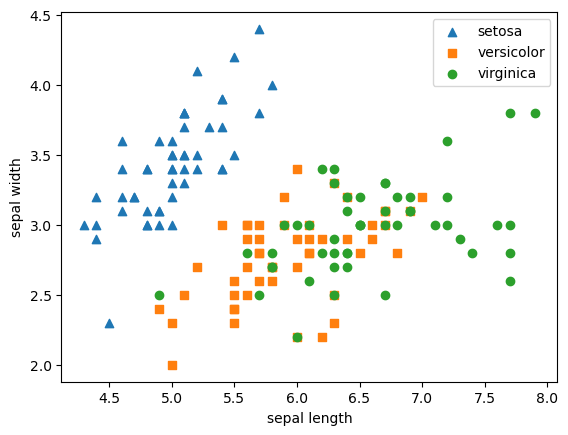

In [115]:
markers = ["^", "s", "o"]

# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['target']==i]['sepal_length']
    y_axis_data = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [116]:
from sklearn.preprocessing import StandardScaler

iris_f_scaled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])

In [117]:
iris_f_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [118]:
#4차원 -> 2차원으로 차원축소

In [120]:
from sklearn.decomposition import PCA

In [121]:
pca=PCA(n_components=2)

In [122]:
pca.fit(iris_f_scaled)#4차원 -> 2차원으로 차원축소

PCA(n_components=2)

In [123]:
iris_pca=pca.transform(iris_f_scaled)

In [124]:
iris_pca.shape

(150, 2)

In [125]:
iris_f_scaled.shape

(150, 4)

In [132]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [127]:
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [129]:
iris_f_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [131]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [133]:
pca_columns=['pca_component_1','pca_component_2']


In [134]:
iris_df_pca = pd.DataFrame(iris_pca, columns = pca_columns)
iris_df_pca['target'] = iris.target

In [135]:
iris_df_pca

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


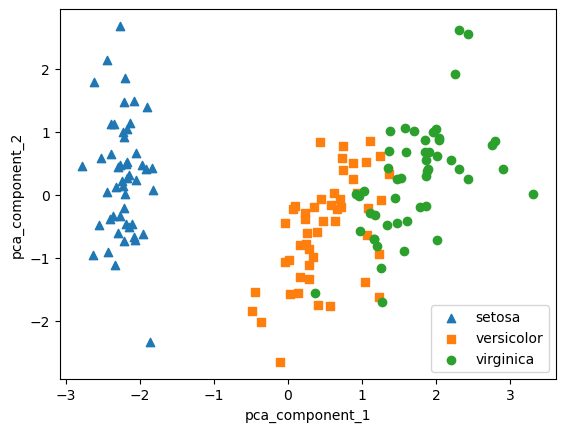

In [136]:
markers = ["^", "s", "o"]

# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_1']
    y_axis_data = iris_df_pca[iris_df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [137]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf = RandomForestClassifier(random_state=1017)


scores = cross_val_score(rcf, iris_df.iloc[:,:-1], iris_df.target, scoring = "accuracy", cv = 3)

print(f"원본 데이터 fold별 정확도: {scores}")
print(f"원본 데이터 평균 정확도: {np.mean(scores):.4f}")

원본 데이터 fold별 정확도: [0.98 0.94 0.92]
원본 데이터 평균 정확도: 0.9467


In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf = RandomForestClassifier(random_state=1017)


scores = cross_val_score(rcf, iris_df_pca.iloc[:,:-1], iris_df_pca.target, scoring = "accuracy", cv = 3)

print(f"pca 데이터 fold별 정확도: {scores}")
print(f"pca 데이터 평균 정확도: {np.mean(scores):.4f}")

pca 데이터 fold별 정확도: [0.88 0.88 0.88]
pca 데이터 평균 정확도: 0.8800


In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rcf = RandomForestClassifier(random_state=1017)


scores = cross_val_score(rcf, iris_df.iloc[:,:2], iris_df.target, scoring = "accuracy", cv = 3)

print(f"sepal width, sepal length 데이터 fold별 정확도: {scores}")
print(f"sepal width, sepal length: {np.mean(scores):.4f}")

sepal width, sepal length 데이터 fold별 정확도: [0.72 0.76 0.68]
sepal width, sepal length: 0.7200


In [141]:
iris_df.iloc[:,:2]

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [152]:
pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-navigator            2.4.2
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
apyori                        1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat  

In [155]:
pip install pip==21.3.1 

     ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
     ---------- ----------------------------- 0.5/1.7 MB 14.5 MB/s eta 0:00:01
     ---------------------------------- ----- 1.5/1.7 MB 18.8 MB/s eta 0:00:01
     ---------------------------------------- 1.7/1.7 MB 15.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 21.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [158]:
pip install --upgrade pip

  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
Note: you may need to restart the kernel to use updated packages.


In [159]:
pip install scikit-surprise

     ---------------------------------------- 0.0/772.0 kB ? eta -:--:--
     ----------------------- ------------- 481.3/772.0 kB 15.2 MB/s eta 0:00:01
     ------------------------------------  768.0/772.0 kB 16.1 MB/s eta 0:00:01
     -------------------------------------- 772.0/772.0 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for scikit-surprise
Failed to build scikit-surprise
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [101 lines of output]
  C:\Users\user\AppData\Local\Temp\pip-install-z5_gqp64\scikit-surprise_dec5c32b94d94eb39b459be2c5865cf3\setup.py:65: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!
  
          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          ********************************************************************************
  
  !!
    dist.Distribution().fetch_build_eggs(["numpy>=1.17.3"])
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\surprise
  copying surprise\accuracy.py -> build\lib.win-amd64-cpython-311\surprise
  copying surprise\bui

In [161]:
import surprise

In [ ]:
 pip install numpy

In [162]:
from surprise import Dataset
from surprise.model_selection import train_test_split

data = Dataset.load_builtin('ml-100k')

trainset, testset = train_test_split(data, test_size=0.25, random_state=0)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\user/.surprise_data/ml-100k


In [163]:
import numpy as np
import pandas as pd
import random

from surprise import accuracy
from surprise import Dataset
from surprise import Reader
from surprise import SVD
from surprise.model_selection import GridSearchCV

In [165]:
np.random.seed(20231030)

In [168]:
ratings_data=pd.read_csv("ratings.csv")


In [169]:
ratings_data['book_id']

0             1
1             1
2             1
3             1
4             1
          ...  
981751    10000
981752    10000
981753    10000
981754    10000
981755    10000
Name: book_id, Length: 981756, dtype: int64

In [170]:
len(set(ratings_data['book_id']))

10000

In [171]:
len(set(ratings_data['user_id']))

53424

In [172]:
reader = Reader(rating_scale=(1, 5))

In [175]:
ratings_data
data=Dataset.load_from_df(ratings_data[['user_id','book_id','rating']], reader)

In [179]:
raw_ratings=data.raw_ratings
raw_ratings

[(314, 1, 5.0, None),
 (439, 1, 3.0, None),
 (588, 1, 5.0, None),
 (1169, 1, 4.0, None),
 (1185, 1, 4.0, None),
 (2077, 1, 4.0, None),
 (2487, 1, 4.0, None),
 (2900, 1, 5.0, None),
 (3662, 1, 4.0, None),
 (3922, 1, 5.0, None),
 (5379, 1, 5.0, None),
 (5461, 1, 3.0, None),
 (5885, 1, 5.0, None),
 (6630, 1, 5.0, None),
 (7563, 1, 3.0, None),
 (9246, 1, 1.0, None),
 (10140, 1, 4.0, None),
 (10146, 1, 5.0, None),
 (10246, 1, 4.0, None),
 (10335, 1, 4.0, None),
 (10610, 1, 5.0, None),
 (10944, 1, 5.0, None),
 (11854, 1, 4.0, None),
 (11927, 1, 4.0, None),
 (12471, 1, 5.0, None),
 (13282, 1, 5.0, None),
 (13544, 1, 5.0, None),
 (15494, 1, 5.0, None),
 (16377, 1, 4.0, None),
 (16913, 1, 5.0, None),
 (17434, 1, 5.0, None),
 (17663, 1, 5.0, None),
 (17984, 1, 5.0, None),
 (18031, 1, 5.0, None),
 (18313, 1, 5.0, None),
 (18361, 1, 4.0, None),
 (20076, 1, 3.0, None),
 (20467, 1, 3.0, None),
 (20848, 1, 5.0, None),
 (21228, 1, 5.0, None),
 (21487, 1, 4.0, None),
 (21713, 1, 5.0, None),
 (22602, 1,

In [180]:
len(raw_ratings)

981756

In [ ]:
random.shuffle(raw_ratings)

In [182]:
raw_ratings

[(31528, 5027, 3.0, None),
 (7372, 6674, 3.0, None),
 (34365, 9501, 5.0, None),
 (8281, 9788, 4.0, None),
 (24630, 1321, 5.0, None),
 (8440, 733, 3.0, None),
 (32841, 3244, 4.0, None),
 (10007, 7815, 3.0, None),
 (5032, 2187, 5.0, None),
 (16873, 4611, 3.0, None),
 (33021, 6459, 4.0, None),
 (6400, 2243, 4.0, None),
 (1493, 5586, 3.0, None),
 (45668, 7016, 3.0, None),
 (12253, 9192, 4.0, None),
 (7702, 4688, 4.0, None),
 (24582, 4079, 4.0, None),
 (7137, 6081, 5.0, None),
 (17288, 9490, 5.0, None),
 (13206, 9820, 4.0, None),
 (10572, 9051, 4.0, None),
 (40122, 6171, 4.0, None),
 (20466, 8083, 5.0, None),
 (17566, 7597, 3.0, None),
 (40675, 2097, 5.0, None),
 (24635, 9837, 3.0, None),
 (1041, 1727, 4.0, None),
 (8407, 4392, 3.0, None),
 (19035, 1220, 3.0, None),
 (4626, 2586, 4.0, None),
 (22114, 2703, 5.0, None),
 (44375, 9180, 3.0, None),
 (50714, 5570, 3.0, None),
 (50434, 7862, 5.0, None),
 (5817, 6480, 4.0, None),
 (17081, 1809, 5.0, None),
 (52596, 7012, 4.0, None),
 (5487, 978, 5

In [184]:
int(0.9*len(raw_ratings))

883580

In [185]:
train_test_split_index = int(0.9 * len(raw_ratings))

In [189]:
raw_ratings_train = raw_ratings[:train_test_split_index]
raw_ratings_test = raw_ratings[train_test_split_index:]

In [190]:
len(raw_ratings_train)

883580

In [191]:
len(raw_ratings_test)

98176

In [192]:
raw_ratings_train

[(31528, 5027, 3.0, None),
 (7372, 6674, 3.0, None),
 (34365, 9501, 5.0, None),
 (8281, 9788, 4.0, None),
 (24630, 1321, 5.0, None),
 (8440, 733, 3.0, None),
 (32841, 3244, 4.0, None),
 (10007, 7815, 3.0, None),
 (5032, 2187, 5.0, None),
 (16873, 4611, 3.0, None),
 (33021, 6459, 4.0, None),
 (6400, 2243, 4.0, None),
 (1493, 5586, 3.0, None),
 (45668, 7016, 3.0, None),
 (12253, 9192, 4.0, None),
 (7702, 4688, 4.0, None),
 (24582, 4079, 4.0, None),
 (7137, 6081, 5.0, None),
 (17288, 9490, 5.0, None),
 (13206, 9820, 4.0, None),
 (10572, 9051, 4.0, None),
 (40122, 6171, 4.0, None),
 (20466, 8083, 5.0, None),
 (17566, 7597, 3.0, None),
 (40675, 2097, 5.0, None),
 (24635, 9837, 3.0, None),
 (1041, 1727, 4.0, None),
 (8407, 4392, 3.0, None),
 (19035, 1220, 3.0, None),
 (4626, 2586, 4.0, None),
 (22114, 2703, 5.0, None),
 (44375, 9180, 3.0, None),
 (50714, 5570, 3.0, None),
 (50434, 7862, 5.0, None),
 (5817, 6480, 4.0, None),
 (17081, 1809, 5.0, None),
 (52596, 7012, 4.0, None),
 (5487, 978, 5

In [ ]:
#data변수에 담긴 트레인 데이터로 훈련

In [193]:
data.raw_ratings = raw_ratings_train 

In [ ]:
#test 데이터셋 구성

In [194]:
test=data.construct_testset(raw_ratings_test)

In [206]:
param_grid = {
    "n_factors": [70, 55],
    "n_epochs": [20,30], 
    "lr_all": [0.005, 0.025, 0.125],
    "reg_all": [0.08, 0.16, 0.32],  
    "random_state": [0],
}

In [205]:
grid_search.best_params

{'rmse': {'n_factors': 55,
  'n_epochs': 20,
  'lr_all': 0.025,
  'reg_all': 0.16,
  'random_state': 0},
 'mae': {'n_factors': 55,
  'n_epochs': 20,
  'lr_all': 0.025,
  'reg_all': 0.16,
  'random_state': 0}}

In [207]:
grid_search = GridSearchCV(
    SVD,
    param_grid,
    measures=["rmse", "mae"],
    cv=3,  
    refit=True,
    n_jobs=-1,
    joblib_verbose=2
)

In [208]:
grid_search.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.7min finished


In [209]:
best_model=grid_search.best_estimator['rmse']

In [210]:
best_model.predict(uid=10, iid=1000)

Prediction(uid=10, iid=1000, r_ui=None, est=3.7497740606415997, details={'was_impossible': False})

In [211]:
testset_predictions = best_model.test(test)
accuracy.rmse(testset_predictions)

RMSE: 0.8257


0.8256570121168204

In [212]:
testset_predictions

[Prediction(uid=45736, iid=6462, r_ui=3.0, est=3.7350872904094867, details={'was_impossible': False}),
 Prediction(uid=26426, iid=3405, r_ui=5.0, est=4.203400887909078, details={'was_impossible': False}),
 Prediction(uid=26067, iid=3131, r_ui=4.0, est=4.020019996603616, details={'was_impossible': False}),
 Prediction(uid=29377, iid=3518, r_ui=5.0, est=3.500856173912088, details={'was_impossible': False}),
 Prediction(uid=38865, iid=6195, r_ui=3.0, est=3.7183162874845967, details={'was_impossible': False}),
 Prediction(uid=16054, iid=4172, r_ui=5.0, est=4.585638931542748, details={'was_impossible': False}),
 Prediction(uid=11002, iid=4030, r_ui=4.0, est=4.190251387017042, details={'was_impossible': False}),
 Prediction(uid=37242, iid=2529, r_ui=4.0, est=3.653175374146595, details={'was_impossible': False}),
 Prediction(uid=1663, iid=8269, r_ui=3.0, est=4.374597133862682, details={'was_impossible': False}),
 Prediction(uid=34017, iid=2912, r_ui=3.0, est=3.0395877499125485, details={'was_

In [213]:
data = Dataset.load_builtin('ml-100k') #무비렌즈

trainset, testset = train_test_split(data, test_size=0.25, random_state=0)

In [214]:
data.raw_ratings[:10] #사용자id, 상품id, 평점, 시간

[('196', '242', 3.0, '881250949'),
 ('186', '302', 3.0, '891717742'),
 ('22', '377', 1.0, '878887116'),
 ('244', '51', 2.0, '880606923'),
 ('166', '346', 1.0, '886397596'),
 ('298', '474', 4.0, '884182806'),
 ('115', '265', 2.0, '881171488'),
 ('253', '465', 5.0, '891628467'),
 ('305', '451', 3.0, '886324817'),
 ('6', '86', 3.0, '883603013')]

In [217]:
len(data.raw_ratings) #100000건

100000

In [218]:
df = pd.read_csv('ml-100k.zip')
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


In [ ]:
reader = Reader(rating_scale=(1, 5))

In [ ]:
#df가 사용자id, 상품id, 평점, 시간 순서임

In [222]:
df.columns
df=df[['user_id', 'item_id', 'rating']]

In [223]:
data=Dataset.load_from_df(df, reader)

In [224]:
from surprise.model_selection import train_test_split

In [225]:
trainset, testset = train_test_split(data, test_size=.2, random_state=42)

In [226]:
svd=SVD()
svd.fit(trainset)

In [227]:
pred=svd.test(testset)

In [231]:
from surprise import accuracy

In [233]:
accuracy.mae(pred)

MAE:  0.7369


0.7369304618979162

In [232]:
accuracy.rmse(pred)

RMSE: 0.9359


0.9358728743488197

In [230]:
pred[1]

Prediction(uid=371, iid=210, r_ui=4.0, est=4.147611115504261, details={'was_impossible': False})

In [229]:
testset

[(907, 143, 5.0),
 (371, 210, 4.0),
 (218, 42, 4.0),
 (829, 170, 4.0),
 (733, 277, 1.0),
 (363, 1512, 1.0),
 (193, 487, 5.0),
 (808, 313, 5.0),
 (557, 682, 2.0),
 (774, 196, 3.0),
 (638, 118, 3.0),
 (632, 81, 5.0),
 (417, 200, 4.0),
 (580, 471, 3.0),
 (640, 91, 4.0),
 (450, 328, 4.0),
 (596, 13, 2.0),
 (586, 467, 4.0),
 (653, 502, 2.0),
 (378, 517, 3.0),
 (405, 65, 1.0),
 (279, 399, 4.0),
 (327, 293, 3.0),
 (346, 276, 1.0),
 (59, 928, 4.0),
 (514, 22, 4.0),
 (807, 402, 5.0),
 (473, 327, 3.0),
 (342, 324, 1.0),
 (269, 136, 4.0),
 (654, 1, 4.0),
 (250, 28, 4.0),
 (282, 689, 2.0),
 (534, 619, 4.0),
 (194, 481, 3.0),
 (184, 118, 2.0),
 (291, 739, 3.0),
 (293, 31, 2.0),
 (943, 1028, 2.0),
 (65, 69, 3.0),
 (562, 135, 5.0),
 (466, 62, 3.0),
 (847, 317, 3.0),
 (650, 521, 3.0),
 (656, 326, 1.0),
 (366, 53, 5.0),
 (15, 280, 3.0),
 (474, 322, 4.0),
 (90, 905, 4.0),
 (503, 19, 5.0),
 (334, 1524, 4.0),
 (90, 632, 5.0),
 (406, 1118, 3.0),
 (899, 515, 3.0),
 (13, 339, 3.0),
 (430, 19, 5.0),
 (24, 729

In [234]:
svd.predict("371", "210")

Prediction(uid='371', iid='210', r_ui=None, est=3.5318875, details={'was_impossible': False})

In [235]:
svd.predict(str(371), str(210))

Prediction(uid='371', iid='210', r_ui=None, est=3.5318875, details={'was_impossible': False})

In [236]:
svd.predict("371", "1")

Prediction(uid='371', iid='1', r_ui=None, est=3.5318875, details={'was_impossible': False})

In [ ]:
#'0':48~'9':57